### Importación de datos



In [2]:
import pandas as pd

# --- 1. Cargar los CSVs ---
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# --- 2. Unir todas las tiendas ---
todas_las_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# --- 3. Agregar columna de facturación ---
todas_las_tiendas['Facturacion'] = todas_las_tiendas['Precio'] + todas_las_tiendas['Costo de envío']

pd.set_option('display.max_columns', None)  # Muestra todas las columnas
todas_las_tiendas.head(10)


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Facturacion
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,171200.0
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,200700.0
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,225500.0
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,798500.0
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,355400.0
5,Bloques de construcción,Juguetes,24200.0,0.0,03/12/2020,Beatriz Morales,Cali,5,Cupón,1,3.43722,-76.52250,24200.0
6,Muñeca bebé,Juguetes,44200.0,0.0,07/08/2021,Juan Fernandez,Bogotá,3,Nequi,1,4.60971,-74.08175,44200.0
7,Lavavajillas,Electrodomésticos,1189700.0,63700.0,18/06/2021,Felipe Santos,Santa Marta,5,Tarjeta de crédito,10,11.24079,-74.19904,1253400.0
8,Lavadora de ropa,Electrodomésticos,1518200.0,79000.0,08/01/2022,Izabela de León,Bogotá,1,Tarjeta de crédito,5,4.60971,-74.08175,1597200.0
9,Carrito de control remoto,Juguetes,75200.0,5100.0,24/02/2020,Beatriz Morales,Bogotá,5,Nequi,1,4.60971,-74.08175,80300.0


#1. Análisis de facturación



Facturación total: $4,638,316,200

Facturación por tienda:
Armenia: $12,883,200
Barranquilla: $139,075,100
Bogotá: $1,911,588,300
Bucaramanga: $95,422,300
Cali: $533,440,000
Cartagena: $107,855,200
Cúcuta: $104,688,200
Inírida: $8,515,700
Leticia: $70,745,000
Manizales: $20,390,800
Medellín: $1,155,171,800
Neiva: $22,006,400
Pasto: $51,627,600
Pereira: $237,927,600
Riohacha: $77,812,500
Santa Marta: $55,932,100
Soacha: $12,978,300
Valledupar: $6,194,600
Villavicencio: $14,061,500


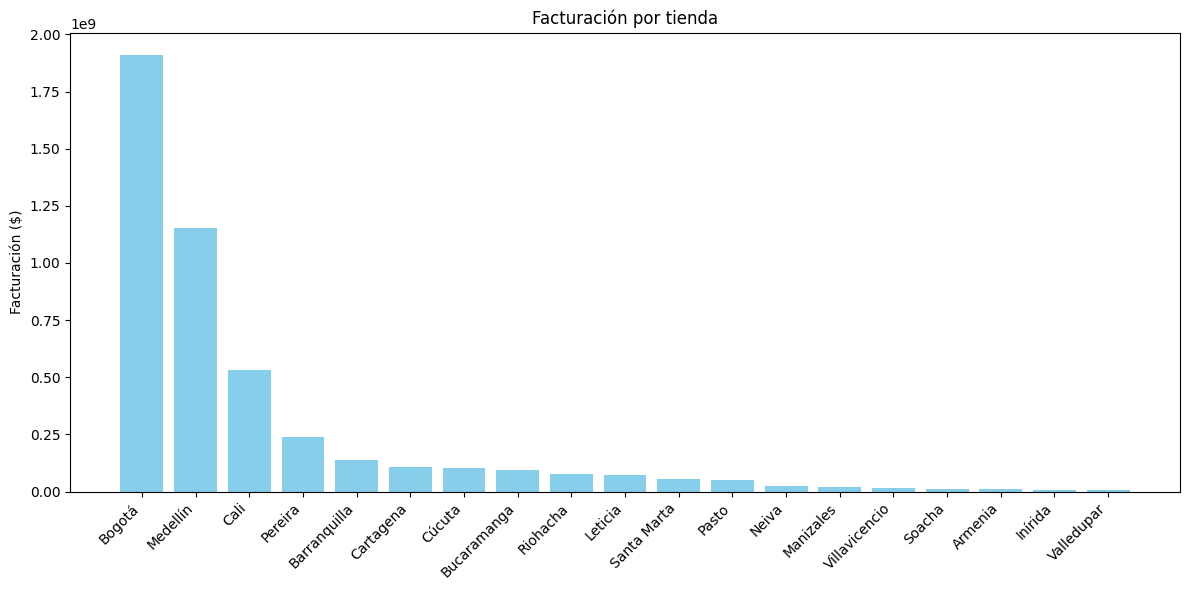

In [ ]:
facturacion_total = todas_las_tiendas['Facturacion'].sum()
print("Facturación total: ${:,.0f}".format(facturacion_total))

facturacion_por_tienda = todas_las_tiendas.groupby('Lugar de Compra')['Facturacion'].sum()
print("\nFacturación por tienda:")
for ciudad, valor in facturacion_por_tienda.items():
    print(f"{ciudad}: ${valor:,.0f}")

import matplotlib.pyplot as plt

facturacion_por_tienda = todas_las_tiendas.groupby('Lugar de Compra')['Facturacion'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.bar(facturacion_por_tienda.index, facturacion_por_tienda.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Facturación ($)')
plt.title('Facturación por tienda')
plt.tight_layout()
plt.show()



# 2. Ventas por categoría


Ventas por categoría:
Artículos para el hogar: $57,579,800
Deportes y diversión: $142,977,700
Electrodomésticos: $1,324,751,100
Electrónicos: $1,660,576,500
Instrumentos musicales: $348,772,600
Juguetes: $73,604,400
Libros: $37,696,100
Muebles: $757,661,000


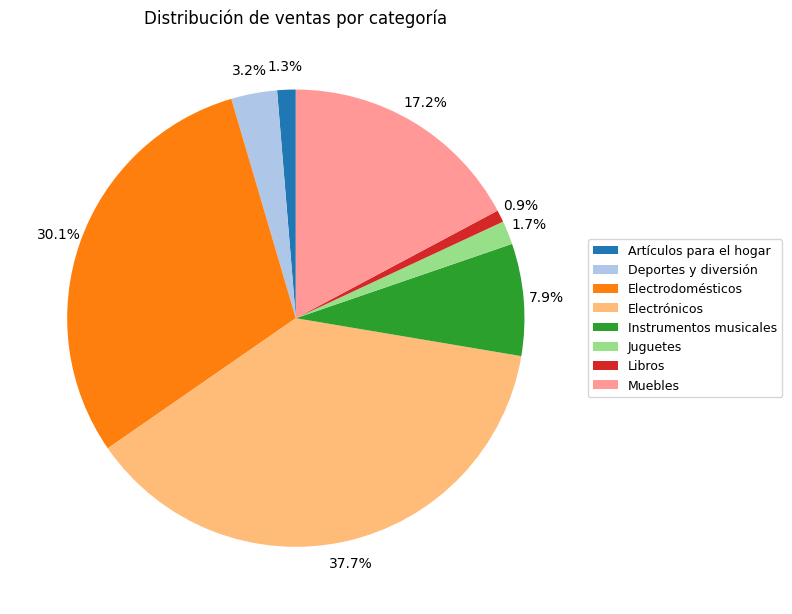

In [5]:
ventas_por_categoria = todas_las_tiendas.groupby('Categoría del Producto')['Precio'].sum()
print("\nVentas por categoría:")
for categoria, valor in ventas_por_categoria.items():
    print(f"{categoria}: ${valor:,.0f}")


import matplotlib.pyplot as plt

# Agrupar ventas por categoría
ventas_por_categoria = todas_las_tiendas.groupby('Categoría del Producto')['Precio'].sum()

# Gráfico circular con porcentajes fuera y leyenda aparte
plt.figure(figsize=(8,8))
plt.pie(
    ventas_por_categoria,
    labels=None,                # Sacamos los labels del pie
    autopct='%1.1f%%',          # Mostramos los porcentajes
    startangle=90,
    pctdistance=1.1,            # Aleja los porcentajes del centro
    colors=plt.cm.tab20.colors,
    textprops={'fontsize': 10}  # Tamaño de los porcentajes
)
plt.legend(
    ventas_por_categoria.index,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=9
)
plt.title('Distribución de ventas por categoría')
plt.tight_layout()
plt.show()




# 3. Calificación promedio de la tienda



Calificación promedio por tienda:
Armenia: 3.46
Barranquilla: 3.80
Bogotá: 4.11
Bucaramanga: 3.98
Cali: 4.05
Cartagena: 4.02
Cúcuta: 3.94
Inírida: 3.64
Leticia: 3.92
Manizales: 3.63
Medellín: 3.93
Neiva: 3.80
Pasto: 4.15
Pereira: 4.01
Riohacha: 3.90
Santa Marta: 3.60
Soacha: 3.89
Valledupar: 4.07
Villavicencio: 3.83


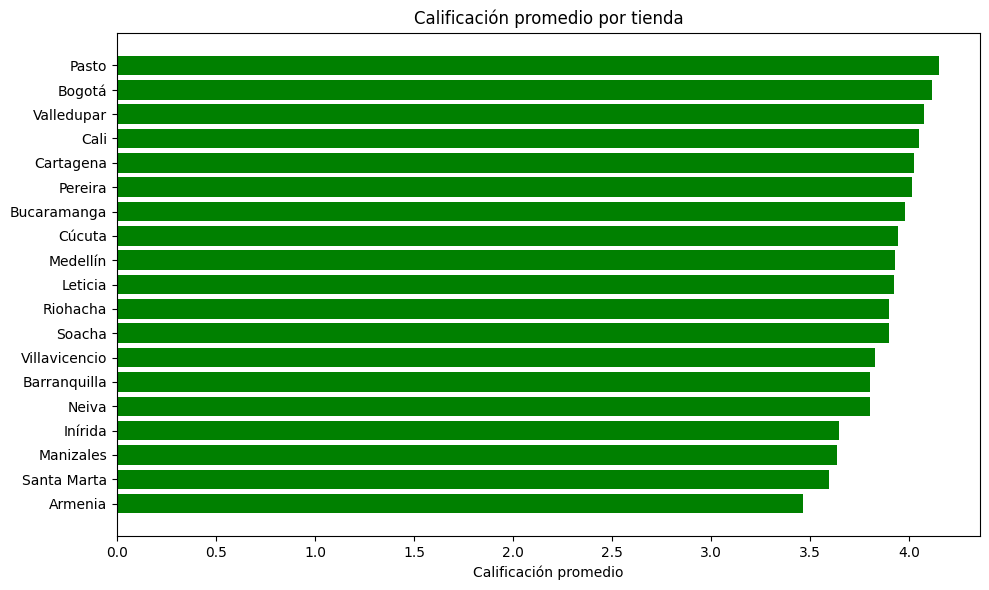

In [ ]:
calificacion_promedio = todas_las_tiendas.groupby('Lugar de Compra')['Calificación'].mean()
print("\nCalificación promedio por tienda:")
for ciudad, valor in calificacion_promedio.items():
    print(f"{ciudad}: {valor:.2f}")

calificacion_promedio = todas_las_tiendas.groupby('Lugar de Compra')['Calificación'].mean().sort_values()
plt.figure(figsize=(10,6))
plt.barh(calificacion_promedio.index, calificacion_promedio.values, color='green')
plt.xlabel('Calificación promedio')
plt.title('Calificación promedio por tienda')
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos


Productos más vendidos:
Mesa de noche: 210 unidades
Carrito de control remoto: 206 unidades
Microondas: 206 unidades
Batería: 203 unidades
Cama king: 201 unidades

Productos menos vendidos:
Ciencia de datos con Python: 166 unidades
Guitarra eléctrica: 165 unidades
Mochila: 163 unidades
Auriculares con micrófono: 158 unidades
Celular ABXY: 157 unidades


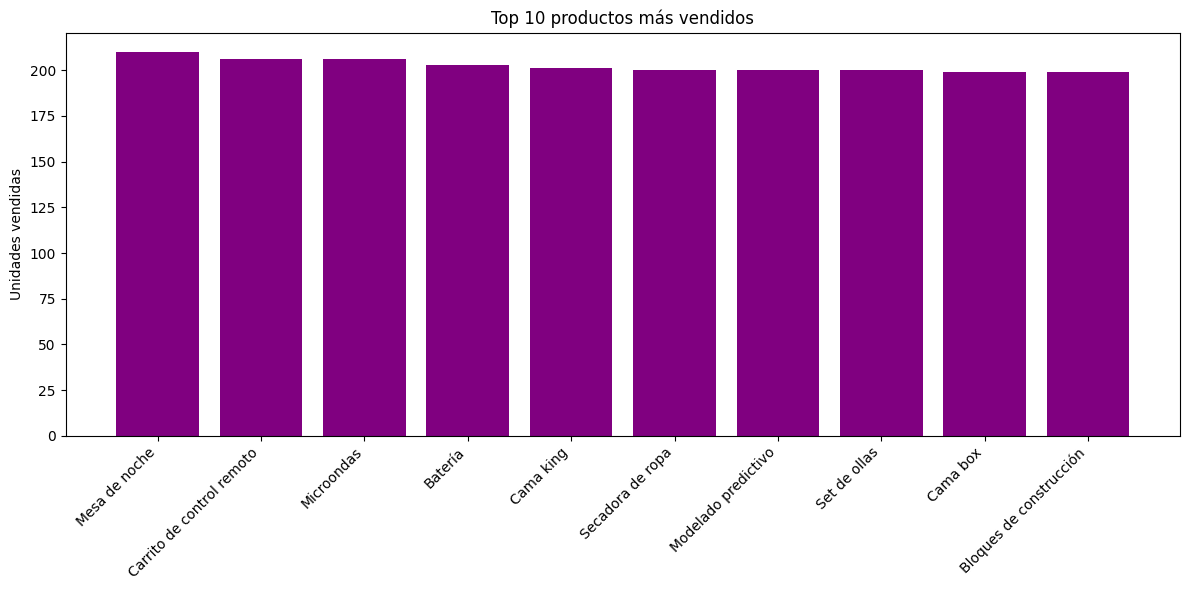

In [ ]:
productos_vendidos = todas_las_tiendas['Producto'].value_counts()
print("\nProductos más vendidos:")
for producto, cantidad in productos_vendidos.head(5).items():
    print(f"{producto}: {cantidad} unidades")
print("\nProductos menos vendidos:")
for producto, cantidad in productos_vendidos.tail(5).items():
    print(f"{producto}: {cantidad} unidades")

productos_vendidos = todas_las_tiendas['Producto'].value_counts().head(10)  # top 10
plt.figure(figsize=(12,6))
plt.bar(productos_vendidos.index, productos_vendidos.values, color='purple')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Unidades vendidas')
plt.title('Top 10 productos más vendidos')
plt.tight_layout()
plt.show()



# 5. Envío promedio por tienda


Costo de envío promedio por tienda:
Armenia: $22,867.86
Barranquilla: $22,692.26
Bogotá: $24,532.08
Bucaramanga: $26,790.06
Cali: $26,726.81
Cartagena: $22,638.43
Cúcuta: $28,597.31
Inírida: $30,557.14
Leticia: $25,317.61
Manizales: $24,948.78
Medellín: $25,282.02
Neiva: $27,710.00
Pasto: $27,801.06
Pereira: $23,211.41
Riohacha: $24,127.61
Santa Marta: $18,752.32
Soacha: $34,768.42
Valledupar: $22,021.43
Villavicencio: $25,100.00


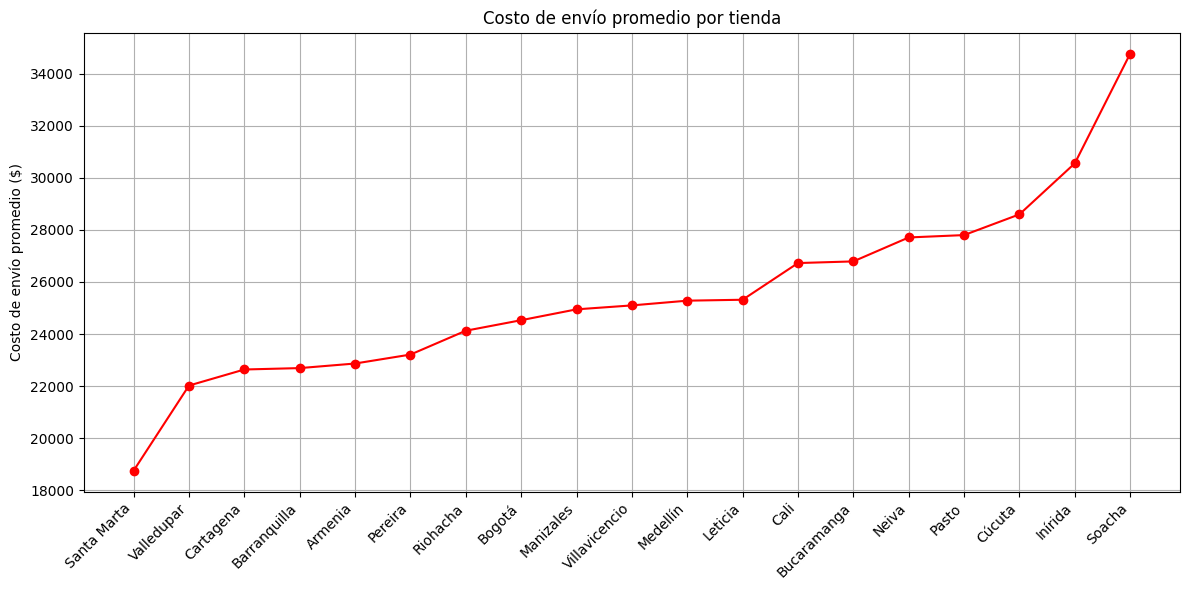

In [ ]:
envio_promedio = todas_las_tiendas.groupby('Lugar de Compra')['Costo de envío'].mean()
print("\nCosto de envío promedio por tienda:")
for ciudad, valor in envio_promedio.items():
    print(f"{ciudad}: ${valor:,.2f}")

envio_promedio = todas_las_tiendas.groupby('Lugar de Compra')['Costo de envío'].mean().sort_values()
plt.figure(figsize=(12,6))
plt.plot(envio_promedio.index, envio_promedio.values, marker='o', linestyle='-', color='red')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Costo de envío promedio ($)')
plt.title('Costo de envío promedio por tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

=== Resumen de métricas por tienda ===

                 Facturación Total  Calificación Promedio  Cantidad de Ventas  \
Lugar de Compra                                                                 
Valledupar            6,194,600.00                   4.07                  14   
Inírida               8,515,700.00                   3.64                  14   
Armenia              12,883,200.00                   3.46                  28   
Soacha               12,978,300.00                   3.89                  19   
Villavicencio        14,061,500.00                   3.83                  29   
Manizales            20,390,800.00                   3.63                  41   
Neiva                22,006,400.00                   3.80                  40   
Pasto                51,627,600.00                   4.15                  94   
Santa Marta          55,932,100.00                   3.60                 151   
Leticia              70,745,000.00                   3.92            

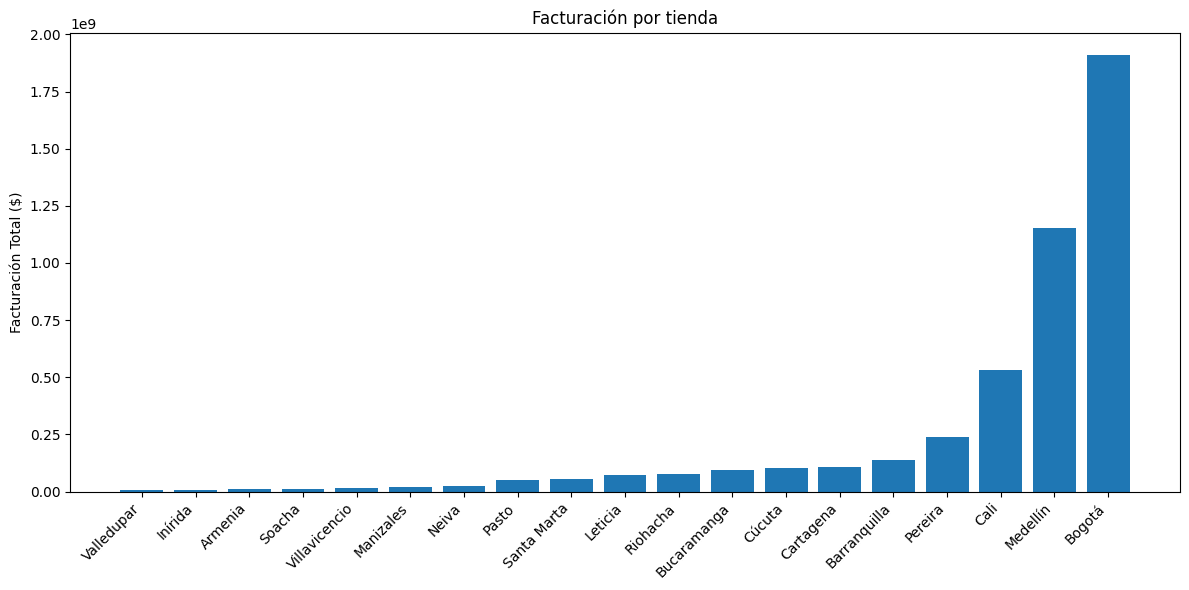

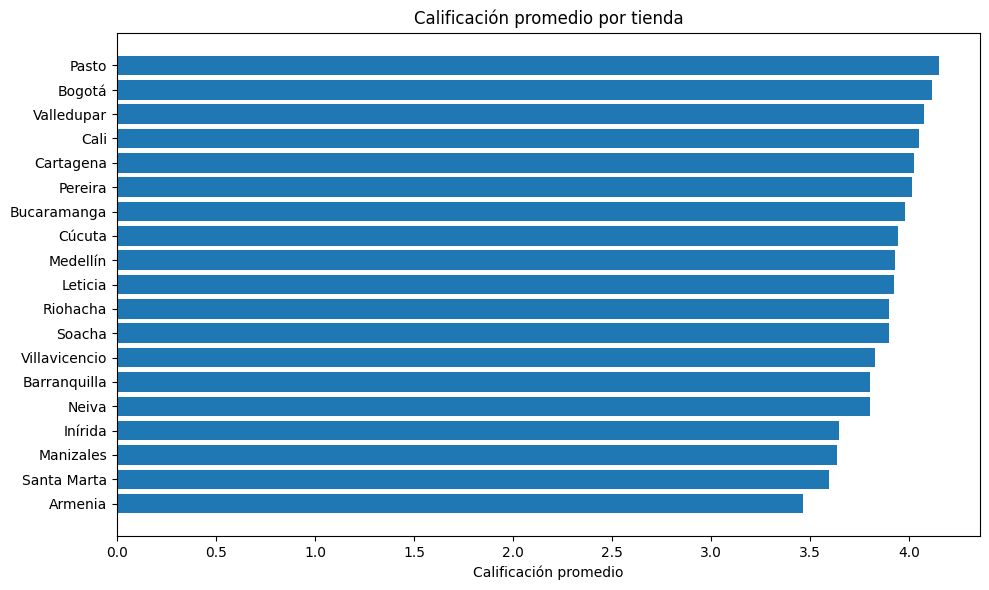

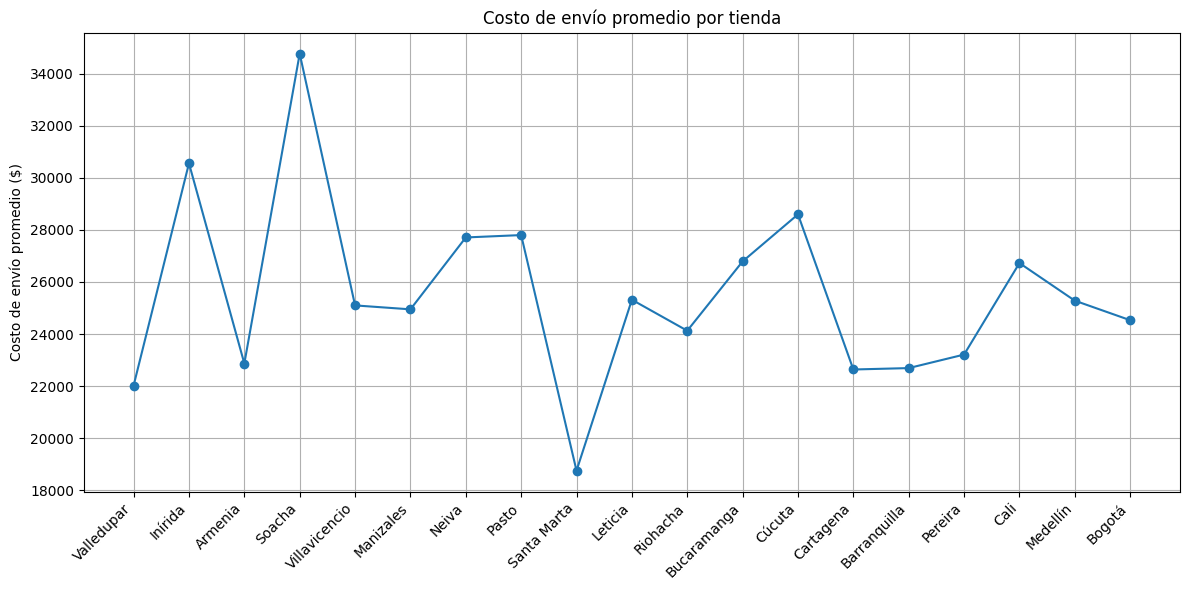


=== Conclusión ===
La tienda con peor desempeño es: Valledupar

Justificación detallada:

Tras analizar las métricas clave de desempeño, Valledupar presenta las cifras más bajas en facturación total, con solo 6,19 millones, lo que refleja un nivel de ventas muy por debajo del promedio de las demás tiendas. Además, la cantidad de ventas registradas es mínima (14 unidades), indicando que el flujo de clientes y la rotación de productos son insuficientes para mantener un negocio rentable.

Si bien la calificación promedio de los clientes es relativamente buena (4.07), esta ventaja no compensa la falta de ingresos y la baja actividad comercial. Asimismo, el costo de envío promedio no representa una ventaja competitiva significativa para atraer más clientes o mejorar la rentabilidad.

Los productos más vendidos son escasos y predominan aquellos de baja rotación, lo que limita el potencial de crecimiento y diversificación de la tienda. En conjunto, estos factores muestran que Valledupar tien

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Carga de datos ---
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

dfs = [pd.read_csv(url) for url in urls]
df = pd.concat(dfs, ignore_index=True)
df.columns = df.columns.str.strip()

# --- 2) Métricas ---
df["Facturacion"] = df["Precio"] + df["Costo de envío"]

resumen_tiendas = df.groupby("Lugar de Compra").agg({
    "Facturacion": "sum",
    "Calificación": "mean",
    "Producto": "count",
    "Costo de envío": "mean"
}).rename(columns={
    "Facturacion": "Facturación Total",
    "Calificación": "Calificación Promedio",
    "Producto": "Cantidad de Ventas",
    "Costo de envío": "Costo de Envío Promedio"
})

resumen_tiendas = resumen_tiendas.sort_values("Facturación Total", ascending=True)
pd.options.display.float_format = '{:,.2f}'.format

print("=== Resumen de métricas por tienda ===\n")
print(resumen_tiendas)

# --- 3) Gráficos ---
plt.figure(figsize=(12,6))
plt.bar(resumen_tiendas.index, resumen_tiendas["Facturación Total"])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Facturación Total ($)')
plt.title('Facturación por tienda')
plt.tight_layout()
plt.show()

calif_asc = resumen_tiendas["Calificación Promedio"].sort_values()
plt.figure(figsize=(10,6))
plt.barh(calif_asc.index, calif_asc.values)
plt.xlabel('Calificación promedio')
plt.title('Calificación promedio por tienda')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(resumen_tiendas.index, resumen_tiendas["Costo de Envío Promedio"], marker='o')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Costo de envío promedio ($)')
plt.title('Costo de envío promedio por tienda')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 4) Conclusión ---
peor_tienda = resumen_tiendas.index[0]
print("\n=== Conclusión ===")
print(f"La tienda con peor desempeño es: {peor_tienda}")
print("""
Justificación detallada:

Tras analizar las métricas clave de desempeño, Valledupar presenta las cifras más bajas en facturación total, con solo 6,19 millones, lo que refleja un nivel de ventas muy por debajo del promedio de las demás tiendas. Además, la cantidad de ventas registradas es mínima (14 unidades), indicando que el flujo de clientes y la rotación de productos son insuficientes para mantener un negocio rentable.

Si bien la calificación promedio de los clientes es relativamente buena (4.07), esta ventaja no compensa la falta de ingresos y la baja actividad comercial. Asimismo, el costo de envío promedio no representa una ventaja competitiva significativa para atraer más clientes o mejorar la rentabilidad.

Los productos más vendidos son escasos y predominan aquellos de baja rotación, lo que limita el potencial de crecimiento y diversificación de la tienda. En conjunto, estos factores muestran que Valledupar tiene un desempeño significativamente inferior al de cualquier otra tienda analizada.

Por estas razones, se recomienda que el Sr. Juan proceda a vender la tienda Valledupar. Esta decisión permitirá liberar recursos financieros y de gestión, los cuales podrán invertirse en un nuevo emprendimiento con mayores oportunidades de crecimiento y rentabilidad, optimizando así el uso de capital y esfuerzos de negocio.
""")